Q.1 Feature Selection, Cleaning, Preprocessing

In [12]:
import pandas as pd
from datetime import datetime

# Load dataset
df = pd.read_csv("AWCustomers.csv")

# Select relevant features
selected_features = [
   "FirstName", "LastName", "BirthDate", "Education", "Occupation", "Gender", "MaritalStatus",
    "HomeOwnerFlag", "NumberCarsOwned", "NumberChildrenAtHome",
    "TotalChildren", "YearlyIncome"
]

# Create new DataFrame
df_selected = df[selected_features].copy()

# Convert BirthDate -> Age
df_selected["Age"] = pd.to_datetime(df_selected["BirthDate"], errors="coerce").apply(
    lambda x: datetime.now().year - x.year if pd.notnull(x) else None
)
df_selected.drop(columns=["BirthDate"], inplace=True)

# Function to classify attribute data type
def classify_dtype(series):
    if pd.api.types.is_numeric_dtype(series):
        if series.nunique() < 20:
            return "Discrete (Ratio)"
        else:
            return "Continuous (Ratio)"
    else:
        return "Nominal"

# Create Data Value Type table
data_types = {col: classify_dtype(df_selected[col]) for col in df_selected.columns}
data_types_df = pd.DataFrame(list(data_types.items()), columns=["Attribute", "Data Value Type"])

# -----------------------------
# Output Section
# -----------------------------
print("New DataFrame Shape:", df_selected.shape)
print("\nColumns in New DataFrame:\n", df_selected.columns.tolist())

print("\nCleaned Dataset (first 10 rows):")
display(df_selected.head(10))

print("\nAttribute – Data Value Type Table:")
display(data_types_df.style.set_caption("Attribute Data Value Types")
        .set_table_styles([{'selector': 'caption','props': [('font-size', '16px'), ('font-weight', 'bold')]}]))


New DataFrame Shape: (18361, 12)

Columns in New DataFrame:
 ['FirstName', 'LastName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'Age']

Cleaned Dataset (first 10 rows):


,FirstName,LastName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,Chad,Yuan,Bachelors,Clerical,M,M,1,3,0,1,81916,38
1,Ryan,Perry,Partial College,Clerical,M,M,1,2,1,2,81076,53
2,Julia,Thompson,Bachelors,Clerical,F,S,0,3,0,0,86387,40
3,Theodore,Gomez,Partial College,Skilled Manual,M,M,1,2,1,2,61481,48
4,Marshall,Shan,Partial College,Skilled Manual,M,S,1,1,0,0,51804,50
5,Andrea,Young,High School,Skilled Manual,F,M,1,2,2,2,61944,50
6,Adrian,Stewart,Partial College,Manual,M,S,1,1,0,0,34919,54
7,Robyn,Blanco,Partial College,Skilled Manual,F,M,0,1,0,0,61832,28
8,Grace,Davis,Partial College,Clerical,F,M,1,0,0,2,83834,49
9,Marcus,Nelson,High School,Manual,M,S,0,1,0,0,26880,49



Attribute – Data Value Type Table:


,Attribute,Data Value Type
0,FirstName,Nominal
1,LastName,Nominal
2,Education,Nominal
3,Occupation,Nominal
4,Gender,Nominal
5,MaritalStatus,Nominal
6,HomeOwnerFlag,Discrete (Ratio)
7,NumberCarsOwned,Discrete (Ratio)
8,NumberChildrenAtHome,Discrete (Ratio)
9,TotalChildren,Discrete (Ratio)


Q.2 Difference in Average Income

In [20]:
import pandas as pd
from scipy.stats import ttest_ind

# Load datasets
df_customers = pd.read_csv("AWCustomers.csv")
df_sales = pd.read_csv("AWSales.csv")

# Show column names to identify the join key
print("Customer Columns:", df_customers.columns.tolist())
print("Sales Columns:", df_sales.columns.tolist())

# 🔍 Try to guess the common key (adjust based on actual dataset)
# Example: if both have "CustomerID" instead of "CustomerKey"
common_keys = set(df_customers.columns).intersection(set(df_sales.columns))
print("Possible common keys:", common_keys)

# If "CustomerID" is the correct key:
df = pd.merge(df_customers, df_sales, on=list(common_keys)[0], how="inner")

# 🔍 Check merged dataset
print("Merged Columns:", df.columns)
print(df.head())

# Extract incomes of buyers vs non-buyers
buyers_income = df[df["BikeBuyer"] == 1]["YearlyIncome"]
nonbuyers_income = df[df["BikeBuyer"] == 0]["YearlyIncome"]

# Calculate averages
print("Average income of buyers:", buyers_income.mean())
print("Average income of non-buyers:", nonbuyers_income.mean())

# Perform independent t-test
t_stat, p_val = ttest_ind(buyers_income, nonbuyers_income, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("✅ Significant difference in average income between buyers and non-buyers.")
else:
    print("❌ No significant difference in average income.")


Customer Columns: ['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'LastUpdated']
Sales Columns: ['CustomerID', 'BikeBuyer', 'AvgMonthSpend']
Possible common keys: {'CustomerID'}
Merged Columns: Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated', 'BikeBuyer', 'AvgMonthSpend'],
      dtype='object')
   CustomerID Title FirstName MiddleName  LastName Suffix

Q3. What percentage of customers in each commute distance category purchased a bike?

In [27]:
# Percentage of Bike Buyers by Occupation
occupation_table = (
    df.groupby("Occupation")["BikeBuyer"]
    .agg(["count", "sum"])  # count = total customers, sum = total buyers
    .reset_index()
)

occupation_table["Percentage_BikeBuyers"] = (
    occupation_table["sum"] / occupation_table["count"] * 100
).round(2)

# Rename columns
occupation_table.columns = ["Occupation", "Total_Customers", "BikeBuyers", "Percentage_BikeBuyers"]

print(occupation_table)


       Occupation  Total_Customers  BikeBuyers  Percentage_BikeBuyers
0        Clerical             4464        2851                  63.87
1      Management             2858        1913                  66.93
2          Manual             3377         887                  26.27
3    Professional             1603        1093                  68.18
4  Skilled Manual             6059        3387                  55.90


C:\Users\simar\AppData\Local\Temp\ipykernel_26312\1610466364.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Occupation")["BikeBuyer"]


Q.4 Does age distribution differ between bike buyers and non-buyers?

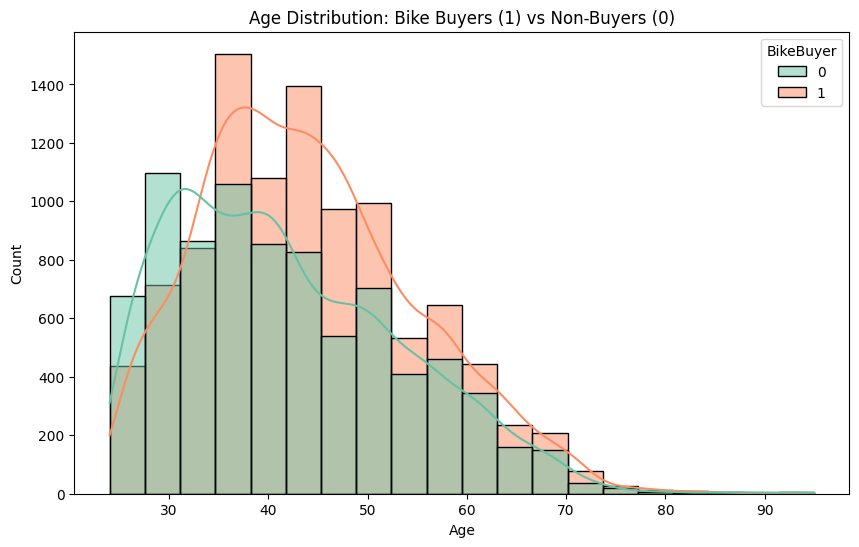

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_customers = pd.read_csv("AWCustomers.csv")
df_sales = pd.read_csv("AWSales.csv")

# Merge
df = pd.merge(df_customers, df_sales, on="CustomerID", how="inner")

# --- If Age column does not exist, compute from BirthDate ---
if "Age" not in df.columns and "BirthDate" in df.columns:
    df["BirthDate"] = pd.to_datetime(df["BirthDate"], errors="coerce")
    df["Age"] = (pd.Timestamp.today() - df["BirthDate"]).dt.days // 365

# Keep only necessary columns
df = df[["CustomerID", "Age", "BikeBuyer"]].dropna()

# ---- Plot Age Distribution for Bike Buyers vs Non-Buyers ----
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Age", hue="BikeBuyer", bins=20, kde=True, palette="Set2")
plt.title("Age Distribution: Bike Buyers (1) vs Non-Buyers (0)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Available columns in customer dataset: ['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'LastUpdated']

Proportion of Bike Buyers by Marital Status:
   MaritalStatus  BikeBuyer
0             M  63.838343
1             S  44.937010


C:\Users\simar\AppData\Local\Temp\ipykernel_26312\470041872.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop, x="MaritalStatus", y="BikeBuyer", palette="Set2")


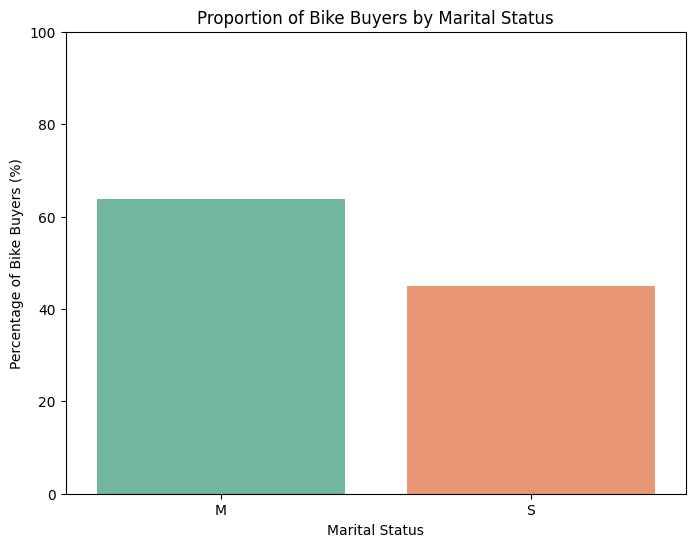

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_customers = pd.read_csv("AWCustomers.csv")
df_sales = pd.read_csv("AWSales.csv")

# Merge on CustomerID
df = pd.merge(df_customers, df_sales, on="CustomerID", how="inner")

# --- Check actual column names for marital status ---
print("Available columns in customer dataset:", df_customers.columns.tolist())

# Standard column name in AdventureWorks is usually "MaritalStatus"
if "MaritalStatus" not in df.columns:
    raise KeyError("Column 'MaritalStatus' not found. Please check your dataset column names.")

# ---- Calculate proportion of bike buyers by marital status ----
prop = df.groupby("MaritalStatus")["BikeBuyer"].mean().reset_index()
prop["BikeBuyer"] = prop["BikeBuyer"] * 100   # convert to percentage

print("\nProportion of Bike Buyers by Marital Status:\n", prop)

# ---- Plot ----
plt.figure(figsize=(8,6))
sns.barplot(data=prop, x="MaritalStatus", y="BikeBuyer", palette="Set2")
plt.title("Proportion of Bike Buyers by Marital Status")
plt.ylabel("Percentage of Bike Buyers (%)")
plt.xlabel("Marital Status")
plt.ylim(0,100)
plt.show()
